In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [98]:
titanic=pd.read_csv('titanic.csv')

In [99]:
titanic.shape

(891, 16)

In [100]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [101]:
titanic.tail()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [102]:
titanic.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [103]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  who           891 non-null    object 
 11  adult_male    891 non-null    bool   
 12  deck          203 non-null    object 
 13  embark_town   889 non-null    object 
 14  alive         891 non-null    object 
 15  alone         891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(7)
memory usage: 99.3+ KB


In [104]:
titanic.nunique()

passenger_id    891
survived          2
pclass            3
sex               2
age              88
sibsp             7
parch             7
fare            248
embarked          3
class             3
who               3
adult_male        2
deck              7
embark_town       3
alive             2
alone             2
dtype: int64

In [105]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

Removing the missing values

In [106]:
titanic.isnull().sum()

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
class             0
who               0
adult_male        0
deck            688
embark_town       2
alive             0
alone             0
dtype: int64

In [107]:
titanic=titanic.drop('deck' ,axis=1)

In [110]:
titanic['age'].fillna(titanic['age'].mean() ,inplace=True)


In [109]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0],inplace=True)

In [111]:
titanic_cleaned=titanic.drop('embark_town',axis=1)

In [112]:
titanic_cleaned.isnull().sum()

passenger_id    0
survived        0
pclass          0
sex             0
age             0
sibsp           0
parch           0
fare            0
embarked        0
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

Visulaization of data

In [113]:
# no of males and females survived
titanic[titanic['survived']==1].value_counts('sex')

sex
female    233
male      109
dtype: int64

<AxesSubplot: xlabel='sex', ylabel='count'>

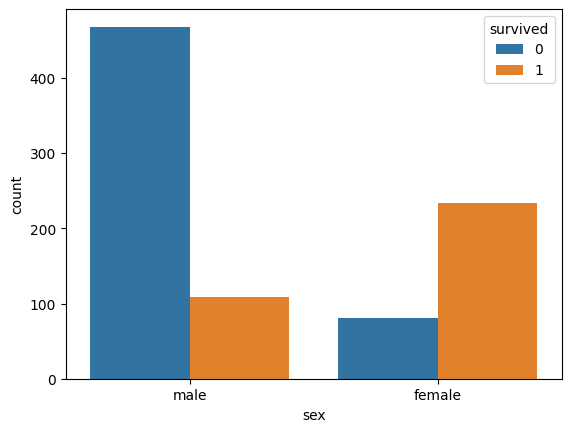

In [114]:
# visual representation of survivals
sns.countplot(x='sex',hue='survived',data=titanic_cleaned)

We can also conclude that exactly 109 males survived and 233 females survived=== Hence no of survivals are greater in females

<AxesSubplot: xlabel='pclass', ylabel='count'>

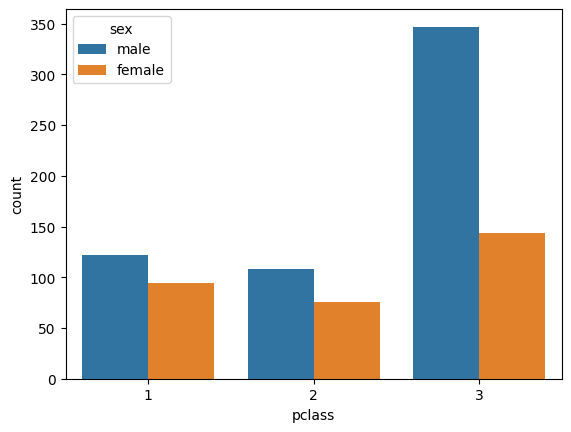

In [115]:
sns.countplot(x='pclass' ,hue='sex' ,data=titanic_cleaned)

<AxesSubplot: xlabel='survived', ylabel='count'>

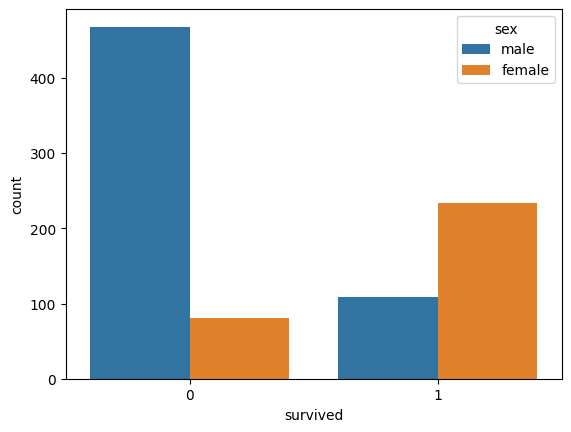

In [116]:
sns.countplot(x='survived',hue='sex',data=titanic_cleaned)

<AxesSubplot: xlabel='embarked', ylabel='count'>

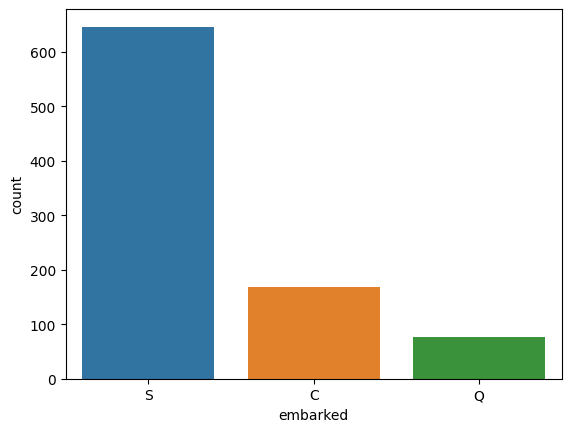

In [117]:
sns.countplot(x='embarked',data=titanic_cleaned)

<AxesSubplot: xlabel='embarked', ylabel='count'>

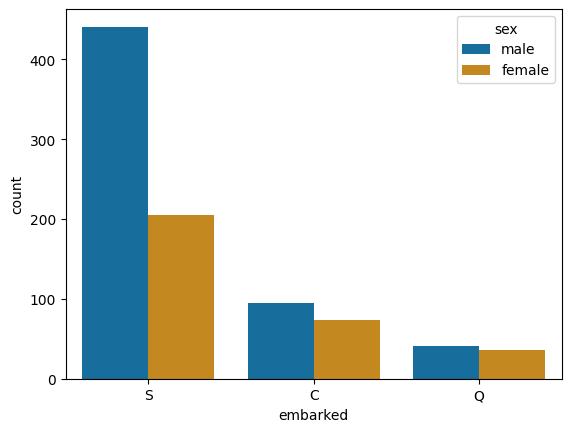

In [118]:
sns.countplot(x='embarked',hue='sex',palette='colorblind',data=titanic_cleaned)

<AxesSubplot: xlabel='embarked', ylabel='count'>

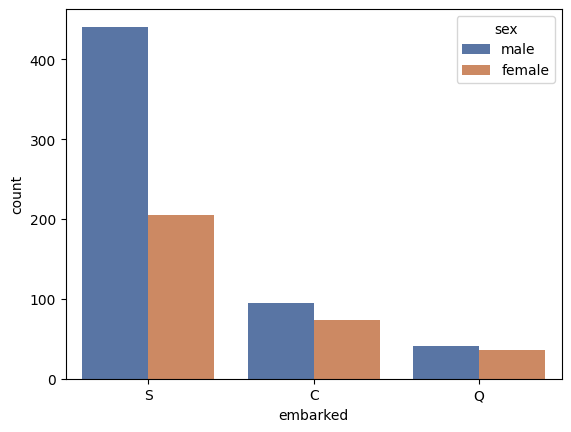

In [119]:
sns.countplot(x='embarked',hue='sex',palette='deep' ,data=titanic_cleaned)

In [120]:
correlation=titanic_cleaned.corr()

C:\Users\rida6\AppData\Local\Temp\ipykernel_26536\1552750253.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=titanic_cleaned.corr()


<AxesSubplot: >

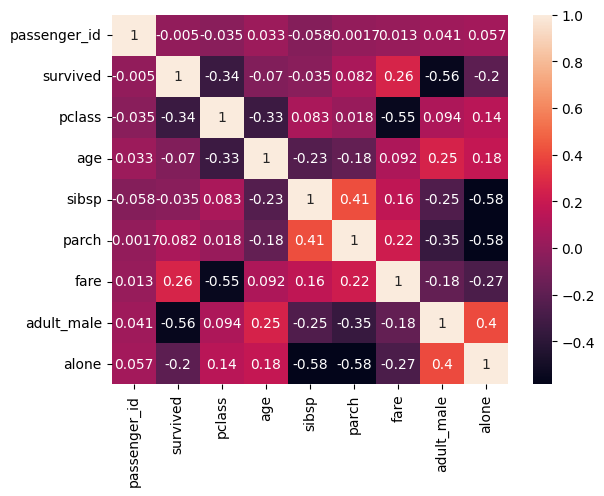

In [121]:
sns.heatmap(correlation, annot=True)

encoding of columns for machine learning algorithm

In [122]:
titanic_cleaned.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,no,True


In [194]:
target=titanic_cleaned['survived']
features=titanic_cleaned.drop(columns=['passenger_id','survived','alive'], axis=1)

In [195]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [196]:
features

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,male,22.000000,1,0,7.2500,S,Third,man,True,False
1,1,female,38.000000,1,0,71.2833,C,First,woman,False,False
2,3,female,26.000000,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.000000,1,0,53.1000,S,First,woman,False,False
4,3,male,35.000000,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S,Second,man,True,True
887,1,female,19.000000,0,0,30.0000,S,First,woman,False,True
888,3,female,29.699118,1,2,23.4500,S,Third,woman,False,False
889,1,male,26.000000,0,0,30.0000,C,First,man,True,True


In [197]:
features.replace({
    'sex': {'male':0,'female':1},
    'embarked':{'S': 0 ,'C': 1,'Q': 2},
    'class':{'First':1,'Second':2,'Third':3},
    'who':{'man': 0,'woman':1,'child':2},
    'adult_male':{'True':1,'False':0},
    'alone':{'False':0,'True':1}
},inplace=True)

In [198]:
features

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,3,0,22.000000,1,0,7.2500,0,3,0,True,False
1,1,1,38.000000,1,0,71.2833,1,1,1,False,False
2,3,1,26.000000,0,0,7.9250,0,3,1,False,True
3,1,1,35.000000,1,0,53.1000,0,1,1,False,False
4,3,0,35.000000,0,0,8.0500,0,3,0,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,2,0,True,True
887,1,1,19.000000,0,0,30.0000,0,1,1,False,True
888,3,1,29.699118,1,2,23.4500,0,3,1,False,False
889,1,0,26.000000,0,0,30.0000,1,1,0,True,True


Splitting of dataset into training and testing data

In [199]:
features_train,features_test,target_train,target_test=train_test_split( features,target,test_size=0.2,random_state=52)

In [200]:
print("NO OF ROWS AND COLUMS ARE :")
print("target_train:" ,features_train.shape )
print("target_test" , features_test.shape)
print("features_test",target_test.shape)
print("features_train",target_train.shape)

NO OF ROWS AND COLUMS ARE :
target_train: (712, 11)
target_test (179, 11)
features_test (179,)
features_train (712,)


In [3]:
classifier=LogisticRegression()

NameError: name 'LogisticRegression' is not defined

In [214]:
classifier.fit(features_train,target_train)

c:\Users\rida6\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [223]:
training_prediction=classifier.predict(features_train)
training_prediction

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

In [226]:
accuracy_train=accuracy_score(training_prediction,target_train)
accuracy_train

0.8103932584269663

In [227]:
test_prediction=classifier.predict(features_test)

In [229]:
accuracy_test=accuracy_score(test_prediction,target_test)
accuracy_test


0.8268156424581006